In [4]:
library(caret)
library(randomForest)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
load('training.RData')
load('testing.RData')
training = training_imp
testing = testing_imp

In [4]:
#basic parameter tuning
fitControl <- trainControl(## 5-fold CV
  method = "cv", number = 5, verboseIter = TRUE,returnData = FALSE,trim = TRUE)

In [5]:
#Normalization
cols <- dim(training)[2]
preproc = preProcess(training[,-cols],method = c("range"))
training_norm = predict(preproc,training)
testing_norm = predict(preproc,testing)

+(rfe) fit Fold1 size: 30 
-(rfe) fit Fold1 size: 30 
+(rfe) imp Fold1 
-(rfe) imp Fold1 
+(rfe) fit Fold1 size: 25 
-(rfe) fit Fold1 size: 25 
+(rfe) fit Fold1 size: 20 
-(rfe) fit Fold1 size: 20 
+(rfe) fit Fold1 size: 15 
-(rfe) fit Fold1 size: 15 
+(rfe) fit Fold1 size: 10 
-(rfe) fit Fold1 size: 10 
+(rfe) fit Fold1 size:  5 
-(rfe) fit Fold1 size:  5 
+(rfe) fit Fold2 size: 30 
-(rfe) fit Fold2 size: 30 
+(rfe) imp Fold2 
-(rfe) imp Fold2 
+(rfe) fit Fold2 size: 25 
-(rfe) fit Fold2 size: 25 
+(rfe) fit Fold2 size: 20 
-(rfe) fit Fold2 size: 20 
+(rfe) fit Fold2 size: 15 
-(rfe) fit Fold2 size: 15 
+(rfe) fit Fold2 size: 10 
-(rfe) fit Fold2 size: 10 
+(rfe) fit Fold2 size:  5 
-(rfe) fit Fold2 size:  5 
+(rfe) fit Fold3 size: 30 
-(rfe) fit Fold3 size: 30 
+(rfe) imp Fold3 
-(rfe) imp Fold3 
+(rfe) fit Fold3 size: 25 
-(rfe) fit Fold3 size: 25 
+(rfe) fit Fold3 size: 20 
-(rfe) fit Fold3 size: 20 
+(rfe) fit Fold3 size: 15 
-(rfe) fit Fold3 size: 15 
+(rfe) fit Fold3 size: 10 
-

[1] "DeathProbability"                "IsRenalReplacementTherapy"      
 [3] "IsNonInvasiveVentilation"        "IsVasopressors"                 
 [5] "SofaScore"                       "AdmissionSourceName"            
 [7] "PaCO21h"                         "HighestHeartRate24h"            
 [9] "LowestGlasgowComaScale24h"       "LowestPlateletsCount24h"        
[11] "HighestRespiratoryRate24h"       "FiO224h"                        
[13] "Gender"                          "HighestCreatinine24h"           
[15] "HighestTemperature24h"           "Age"                            
[17] "Bilirubin24h"                    "BMI"                            
[19] "HighestLeukocyteCount24h"        "IsChfNyhaClass4"                
[21] "IsCrfDialysis"                   "IsDiabetes"                     
[23] "IsSevereCopd"                    "IsSolidTumorMetastatic"         
[25] "Lactate24h"                      "LowestDiastolicBloodPressure24h"
[27] "LowestSystolicBloodPressure24h"  "PaO24h"                         
[29] "pH24h"                           "Urea24h"

[1] "DeathProbability"          "IsRenalReplacementTherapy"
[3] "IsNonInvasiveVentilation"  "IsVasopressors"           
[5] "SofaScore"                 "AdmissionSourceName"

,Overall
,<dbl>
DeathProbability,0.14066909
IsRenalReplacementTherapy,0.11789435
IsNonInvasiveVentilation,0.07701400
IsVasopressors,0.06087444
SofaScore,0.05570600
AdmissionSourceName,0.03649806


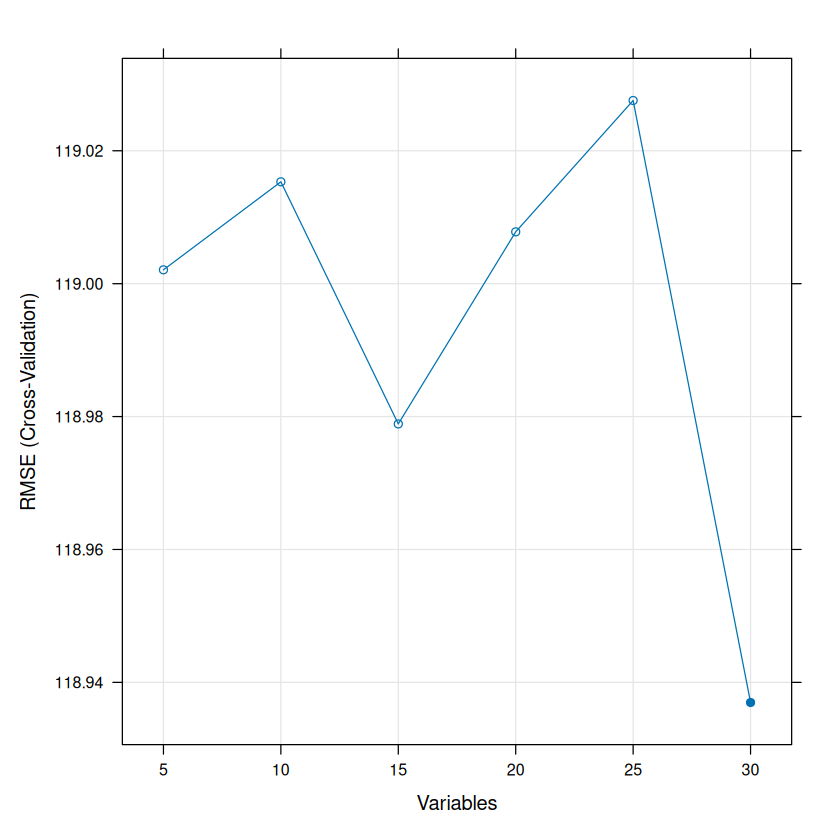

In [20]:
#Recursive feature elimination using Treebag functions
set.seed(420)
subsets = c(5,10,15,20,25,30)
rfe_control = rfeControl(functions=treebagFuncs,
                         method = "cv",
                         number = 5,
                         returnResamp = "all",
                         verbose = T)
rfe_result = rfe(training_norm[,-cols],
                 training_norm[,cols],
                 sizes=subsets,
                 metric="RMSE",
                 rfeControl = rfe_control)

print(rfe_result)
predictors(rfe_result)
plot(rfe_result,type=c("g","o"))
head(rfe_result$optVariables)
head(varImp(rfe_result))
save(rfe_result,file="rfe_result_treebag.RData")


In [6]:
#Recursive feature elimination using Random Forests functions
set.seed(100) 
subsets = c(5,10,15,20,25,30)
rfe_control = rfeControl(functions=rfFuncs,
                         method = "cv",
                         number = 5,
                         verbose = T,
                         saveDetails = F,
                         returnResamp = "none")
rfe_result = rfe(training[,-cols],
                 training[,cols],
                 sizes=subsets,
                 metric="RMSE",
                 rfeControl = rfe_control)
save(rfe_result,file="rfe_result_RF.RData")

+(rfe) fit Fold1 size: 30 


: 

In [ ]:
rfe_result$results
rfe_result$fit
head(rfe_result$optVariables)
head(varImp(rfe_result))
head(rfe_result$variables)

Variables,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,119.0021,0.1221845,51.57860,2.258069,0.004998706,0.1457323
10,119.0153,0.1219707,51.58581,2.201079,0.004098991,0.1254412
15,118.9789,0.1225200,51.53920,2.200311,0.004302390,0.2366145
20,119.0078,0.1221018,51.58127,2.296649,0.005215831,0.1999011
25,119.0276,0.1217729,51.62768,2.178830,0.003081585,0.3631082
30,118.9370,0.1231292,51.43747,2.157213,0.003561752,0.2592225



Bagging regression trees with 25 bootstrap replications 


[1] "DeathProbability"          "IsRenalReplacementTherapy"
[3] "IsNonInvasiveVentilation"  "IsVasopressors"           
[5] "SofaScore"                 "AdmissionSourceName"

,Overall
,<dbl>
DeathProbability,0.14066909
IsRenalReplacementTherapy,0.11789435
IsNonInvasiveVentilation,0.07701400
IsVasopressors,0.06087444
SofaScore,0.05570600
AdmissionSourceName,0.03649806


,Overall,var,Variables,Resample
,<dbl>,<chr>,<dbl>,<chr>
1,0.14244537,DeathProbability,30,Fold1
2,0.11611897,IsRenalReplacementTherapy,30,Fold1
3,0.07720665,IsNonInvasiveVentilation,30,Fold1
4,0.06017755,IsVasopressors,30,Fold1
5,0.05351004,SofaScore,30,Fold1
6,0.03617951,AdmissionSourceName,30,Fold1


In [2]:
load('rfe_result_treebag.RData')

In [7]:

predictors(rfe_result)

[1] "DeathProbability"                "IsRenalReplacementTherapy"      
 [3] "IsNonInvasiveVentilation"        "IsVasopressors"                 
 [5] "SofaScore"                       "AdmissionSourceName"            
 [7] "PaCO21h"                         "HighestHeartRate24h"            
 [9] "LowestGlasgowComaScale24h"       "LowestPlateletsCount24h"        
[11] "HighestRespiratoryRate24h"       "FiO224h"                        
[13] "Gender"                          "HighestCreatinine24h"           
[15] "HighestTemperature24h"           "Age"                            
[17] "Bilirubin24h"                    "BMI"                            
[19] "HighestLeukocyteCount24h"        "IsChfNyhaClass4"                
[21] "IsCrfDialysis"                   "IsDiabetes"                     
[23] "IsSevereCopd"                    "IsSolidTumorMetastatic"         
[25] "Lactate24h"                      "LowestDiastolicBloodPressure24h"
[27] "LowestSystolicBloodPressure24h"  "PaO24h"                         
[29] "pH24h"                           "Urea24h"